### 🐍🐼 Python-Pandas: Temporal and ordered merging with merge_asof and merge_ordered

🌟 **How do you handle unsynchronized or disordered data?**  
In data science, missing data is common. However, we can tackle it with powerful pandas tools like `merge_asof` and `merge_ordered`.

🔎 **What do these functions do?**  
- ✨ `merge_asof`: Aligns datasets by matching each row to the closest in time.  
- ✨ `merge_ordered`: Merges and sorts data by multiple keys, perfect for sequential combinations.

🎯 **Practical case:**  
We used an air quality dataset to combine two pollutants: NO₂ and PM₂.  
1️⃣ Aligned measurements temporally using `merge_asof`.  
2️⃣ Sorted the combinations and handled missing values (NaN) for clearer analysis.

💡 **Impact:**  
These techniques are essential for real-world problems like:  
- 🌐 Analyzing sensor data trends over time.  
- 📈 Aligning measurements from multiple sources for predictive models.

📊 **Graph:**  
The graph highlights aligned NO₂ and PM₂ concentrations over time, with missing data handled to reveal clear patterns. How could you apply this to your projects?

🌍 Share your thoughts and follow me for more practical pandas and data science tips!  
🚀 📚 🧠 💻

[Enlace al repositorio en GitHub](https://github.com/jcombari/PyForAll)

 🌍✨ #mergeasof #mergeordered #pandaspython #datascience #timedata #datavisualization #airquality

--- 

### 🐍🐼 Python-Pandas: Fusión temporal y ordenada con merge_asof y merge_ordered

🌟 **¿Cómo manejas datos desincronizados o desordenados?**  
En la ciencia de datos, encontrar datos faltantes es común. Sin embargo, podemos enfrentarlos con herramientas poderosas de pandas como `merge_asof` y `merge_ordered`.

🔎 **¿Qué hacen estas funciones?**  
- ✨ `merge_asof`: Combina datasets alineando temporalmente cada fila con la más cercana en el tiempo.  
- ✨ `merge_ordered`: Fusiona y ordena datos por múltiples claves, ideal para combinaciones secuenciales.

🎯 **Caso práctico:**  
Usamos un dataset de calidad del aire para combinar dos contaminantes: NO₂ y PM₂.  
1️⃣ Alineamos temporalmente las mediciones con `merge_asof`.  
2️⃣ Ordenamos las combinaciones y manejamos los valores faltantes (NaN) para un análisis claro.

💡 **Impacto:**  
Estas técnicas son esenciales en problemas reales como:  
- 🌐 Analizar tendencias temporales en datos de sensores.  
- 📈 Alinear mediciones de múltiples fuentes para modelos predictivos.

📊 **Gráfico:**  
El gráfico resalta las concentraciones de NO₂ y PM₂ alineadas temporalmente, con datos faltantes manejados para revelar patrones claros. ¿Cómo podrías aplicar esto a tus proyectos?

🌍 Comparte tus ideas y sígueme para más ejemplos prácticos de pandas y ciencia de datos.  
🚀 📚 🧠 💻

[Enlace al repositorio en GitHub](https://github.com/jcombari/PyForAll)

 🌍✨ #mergeasof #mergeordered #pandaspython #datascience #timedata #datavisualization #airquality


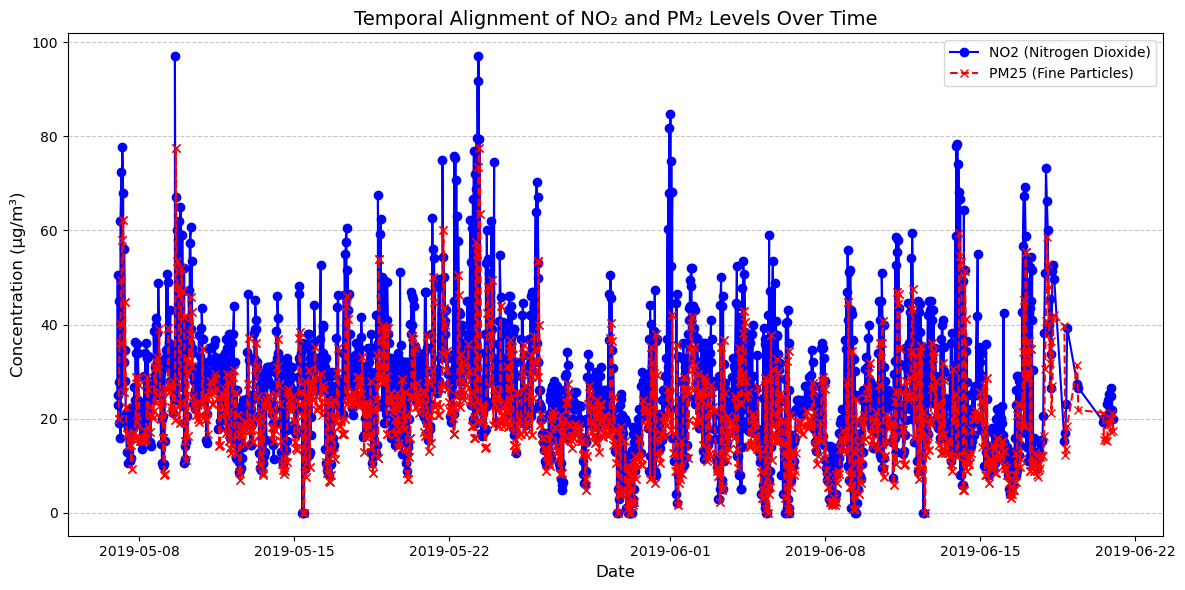

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the air_quality dataset from pandas
air_quality = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv"
)

# Filter data for two pollutants: NO₂ and simulate PM₂ data by modifying NO₂ timestamps slightly
air_quality_no2 = air_quality[air_quality["parameter"] == "no2"].sort_values(by="date.utc")
air_quality_pm25 = air_quality_no2.copy()  # Simulating PM₂ data
air_quality_pm25["parameter"] = "pm25"
air_quality_pm25["value"] *= 0.8  # Adjust values for PM₂
air_quality_pm25["date.utc"] = pd.to_datetime(air_quality_pm25["date.utc"]) + pd.Timedelta(minutes=5)

# Convert datetime columns for both datasets
air_quality_no2["date.utc"] = pd.to_datetime(air_quality_no2["date.utc"])
air_quality_pm25["date.utc"] = pd.to_datetime(air_quality_pm25["date.utc"])

# Merge datasets using merge_asof (temporal alignment)
merged_asof = pd.merge_asof(
    air_quality_no2, air_quality_pm25, on="date.utc", suffixes=("_no2", "_pm25")
)

# Handle missing values (NaN) with forward-fill
merged_asof.ffill(inplace=True)  # Forward-fill missing values

# Combine and order the datasets using merge_ordered
merged_ordered = pd.merge_ordered(
    air_quality_no2, air_quality_pm25, on=["date.utc", "parameter"], suffixes=("_no2", "_pm25")
)
merged_ordered.bfill(inplace=True)  # Backward-fill missing values in merge_ordered

# Plotting the results of the merge_asof (temporal alignment)
plt.figure(figsize=(12, 6))
plt.plot(
    merged_asof["date.utc"],
    merged_asof["value_no2"],
    label="NO2 (Nitrogen Dioxide)",
    color="blue",
    marker="o",
)
plt.plot(
    merged_asof["date.utc"],
    merged_asof["value_pm25"],
    label="PM25 (Fine Particles)",
    color="red",
    linestyle="--",
    marker="x",
)
plt.title("Temporal Alignment of NO₂ and PM₂ Levels Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

